In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sys

from matplotlib import gridspec
from numba import njit, prange
from pyts.image import MarkovTransitionField

import tsia.plot
import tsia.markov
import tsia.network_graph

# Create a toy time series using the sine function
time_points = np.linspace(0, 4 * np.pi, 1000)
x = np.sin(time_points)
X = np.array([x])

<Axes: xlabel='Date'>

<Figure size 1800x500 with 0 Axes>

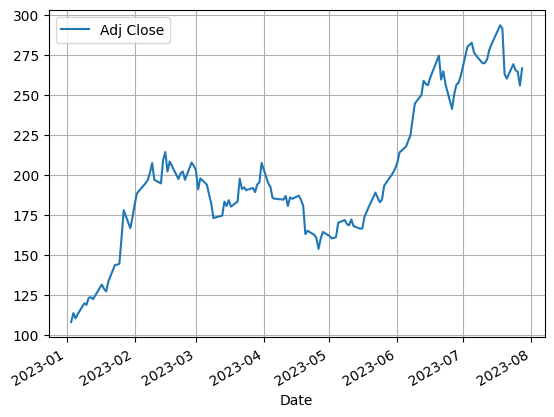

In [8]:
import yfinance as yf

tsla_df = yf.download('TSLA',
                      start='2023-01-01',
                      end='2023-07-30',
                      progress=False)

df = tsla_df[['Adj Close']]
plt.figure(figsize=(18,5))
df.plot(grid=True)

In [9]:
n_bins = 8
strategy = 'quantile'
X = df.values.reshape(1, -1)
n_samples, n_timestamps = X.shape

mtf = MarkovTransitionField(image_size=48, n_bins=n_bins, strategy=strategy)
tag_mtf = mtf.fit_transform(X)

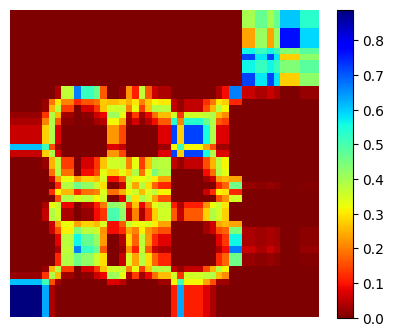

In [11]:
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111)
_, mappable_image = tsia.plot.plot_markov_transition_field(mtf=tag_mtf[0], ax=ax, reversed_cmap=True)
plt.colorbar(mappable_image)